## Pandas Series és Dataframe

In [7]:
# Könyvtár adatelemzéshez
import pandas as pd

# Könyvtár matematikai műveletekhez, lineáris algebra stb.
import numpy as np

In [8]:
# Numpy tömb létrehozása manuálisan

arr = np.array([1,2,3,4,5,6])
arr[0]
arr[0:3]

array([1, 2, 3])

In [9]:
# Tömb elemeinek a szűrése feltétellel

arr < 3
arr[arr < 3]

array([1, 2])

In [10]:
# Pandas series - 1 dimenziós adatszerkezet, indexelhető

numbers_pd = pd.Series(arr)
numbers_pd

0    1
1    2
2    3
3    4
4    5
5    6
dtype: int64

In [11]:
numbers_pd[0]

1

In [12]:
# Műveletek series-eken

print(numbers_pd[1:3]) # intervallum lekérdezése
print('-----------------------------')
print(numbers_pd.iloc[-1]) # a végétől kezdeni a legkrédezést
print('-----------------------------')
print(numbers_pd.iloc[-3:]) # a végétől intervallumot lekérdezni
print('-----------------------------')

1    2
2    3
dtype: int64
-----------------------------
6
-----------------------------
3    4
4    5
5    6
dtype: int64
-----------------------------


In [13]:
# További műveletek

print(numbers_pd.min())
print('-----------------------------')
print(numbers_pd.max())
print('-----------------------------')
print(numbers_pd.value_counts())
print('-----------------------------')
print(numbers_pd.head(2)) # tail

1
-----------------------------
6
-----------------------------
1    1
2    1
3    1
4    1
5    1
6    1
dtype: int64
-----------------------------
0    1
1    2
dtype: int64


In [14]:
# Apply - minden elemre végrehajtunk egy függvényt (mint Spark esetében)

numbers_sq = numbers_pd.apply(lambda x: x**2)
numbers_sq

0     1
1     4
2     9
3    16
4    25
5    36
dtype: int64

In [15]:
numbers_df = pd.DataFrame({'szamok': numbers_pd, 'negyzetek': numbers_sq})
numbers_df

,szamok,negyzetek
0,1,1
1,2,4
2,3,9
3,4,16
4,5,25
5,6,36


In [16]:
numbers_df.head(3)

,szamok,negyzetek
0,1,1
1,2,4
2,3,9


In [17]:
numbers_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6 entries, 0 to 5
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   szamok     6 non-null      int64
 1   negyzetek  6 non-null      int64
dtypes: int64(2)
memory usage: 228.0 bytes


In [18]:
numbers_df.describe()

,szamok,negyzetek
count,6.000000,6.000000
mean,3.500000,15.166667
std,1.870829,13.377842
min,1.000000,1.000000
25%,2.250000,5.250000
50%,3.500000,12.500000
75%,4.750000,22.750000
max,6.000000,36.000000


In [19]:
print(numbers_df.shape)
print(numbers_df.columns)

(6, 2)
Index(['szamok', 'negyzetek'], dtype='object')


In [20]:
# Apply a dataframre. Az axis=1 azt mondja meg, hogy a sorokon menjünk végig

numbers_df['kobok'] = numbers_df.apply(lambda x: x['szamok']**3, axis=1)
numbers_df

,szamok,negyzetek,kobok
0,1,1,1
1,2,4,8
2,3,9,27
3,4,16,64
4,5,25,125
5,6,36,216


In [21]:
# Ha axis=0, akkor az oszlopokon megyünk végig

numbers_df.apply(lambda x: x.sum(), axis=0)

szamok        21
negyzetek     91
kobok        441
dtype: int64

In [22]:
# Sorok szűrése

idx = numbers_df['kobok'] % 2 == 0
idx

0    False
1     True
2    False
3     True
4    False
5     True
Name: kobok, dtype: bool

In [23]:
# Sorok szűrése

numbers_df[idx]

,szamok,negyzetek,kobok
1,2,4,8
3,4,16,64
5,6,36,216


In [24]:
# Számokkal is indexelhetünk

numbers_df.take([0,4])

,szamok,negyzetek,kobok
0,1,1,1
4,5,25,125


In [25]:
# Intervallum lekérdezése

numbers_df[2:4]

,szamok,negyzetek,kobok
2,3,9,27
3,4,16,64


In [26]:
# Adathalmaz beolvasása pandas dataframe-be

df = pd.read_csv("Pokemon.csv")
df.head()

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False


In [27]:
# Dobjuk el az első oszlopot

df.drop(['#'], axis=1)

,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False
...,...,...,...,...,...,...,...,...,...,...,...,...
795,Diancie,Rock,Fairy,600,50,100,150,100,150,50,6,True
796,DiancieMega Diancie,Rock,Fairy,700,50,160,110,160,110,110,6,True
797,HoopaHoopa Confined,Psychic,Ghost,600,80,110,60,150,130,70,6,True
798,HoopaHoopa Unbound,Psychic,Dark,680,80,160,60,170,130,80,6,True


In [28]:
# Néhány feladat

# 1. feladat
# Adjuk meg azokat a pokemonokat, amelyek a második generációba tartoznak 
# és az Defense értékük nagyobb legalább kétszerese az Attacknak

idx1 = df['Generation'] == 2
idx2 = df['Defense'] > df['Attack']*2
df[idx & idx2]

# 2. feladat
# Adjuk meg azokat a pokemonokat, amelyek sebessége átlag fölötti

idx1 = df['Speed'] > df['Speed'].mean()
df[idx1]

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
5,5,Charmeleon,Fire,NaN,405,58,64,58,80,65,80,1,False
6,6,Charizard,Fire,Flying,534,78,84,78,109,85,100,1,False
7,6,CharizardMega Charizard X,Fire,Dragon,634,78,130,111,130,85,100,1,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
794,718,Zygarde50% Forme,Dragon,Ground,600,108,100,121,81,95,95,6,True
796,719,DiancieMega Diancie,Rock,Fairy,700,50,160,110,160,110,110,6,True
797,720,HoopaHoopa Confined,Psychic,Ghost,600,80,110,60,150,130,70,6,True
798,720,HoopaHoopa Unbound,Psychic,Dark,680,80,160,60,170,130,80,6,True


In [29]:
# Csoportosítás

df.groupby(by='Generation').mean()[['Total']]

/tmp/ipykernel_5072/1857560344.py:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.groupby(by='Generation').mean()[['Total']]


,Total
Generation,
1,426.813253
2,418.283019
3,436.225000
4,459.016529
5,434.987879
6,436.378049


In [30]:
# Csoportosítás több oszlop alapján

df.groupby(by=['Generation', 'Legendary']).mean()[['HP', 'Attack']]

/tmp/ipykernel_5072/2406826869.py:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.groupby(by=['Generation', 'Legendary']).mean()[['HP', 'Attack']]


HP      Attack
Generation Legendary                        
1          False       64.612500   74.981250
           True        98.000000  120.833333
2          False       69.613861   70.693069
           True       103.400000   99.000000
3          False       64.626761   76.971831
           True        81.666667  118.333333
4          False       69.740741   79.620370
           True       100.846154  109.846154
5          False       69.353333   78.246667
           True        96.133333  120.266667
6          False       66.189189   70.459459
           True        87.500000  125.250000

In [31]:
# Egyéb műveletek
# https://pandas.pydata.org/Pandas_Cheat_Sheet.pdf

## Adatok megjelenítése

<Axes: xlabel='Speed', ylabel='Defense'>

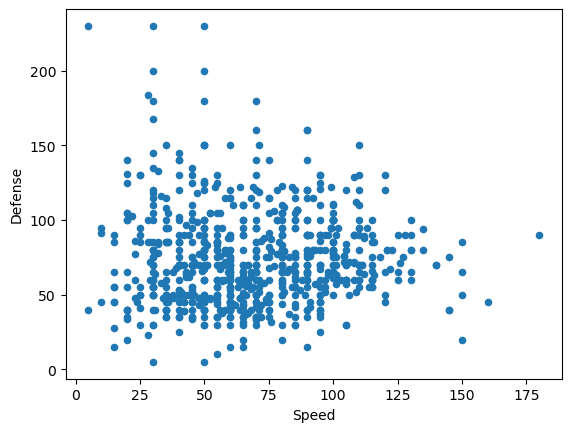

In [32]:
# Ábra kirajzolása
# Nézzük meg hogyan függ össze két attribútum értéke az adathalmazunkban (scatter plot)

df.plot.scatter(x='Speed', y='Defense')

<Axes: xlabel='Speed', ylabel='Defense'>

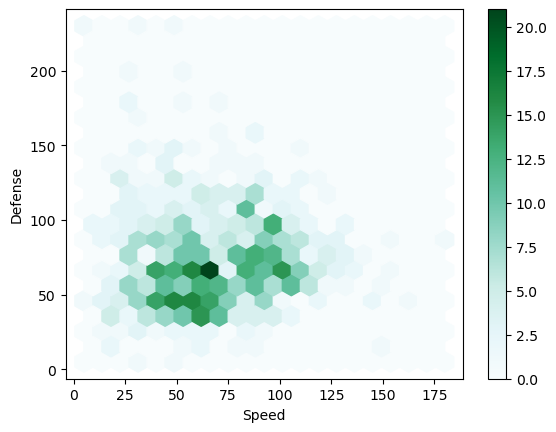

In [33]:
# A pontok binelése hexagonálisan

df.plot.hexbin(x='Speed', y='Defense', gridsize=20)

In [34]:
# Könyvtár ábrák készítéséhez

from matplotlib import pyplot as plt

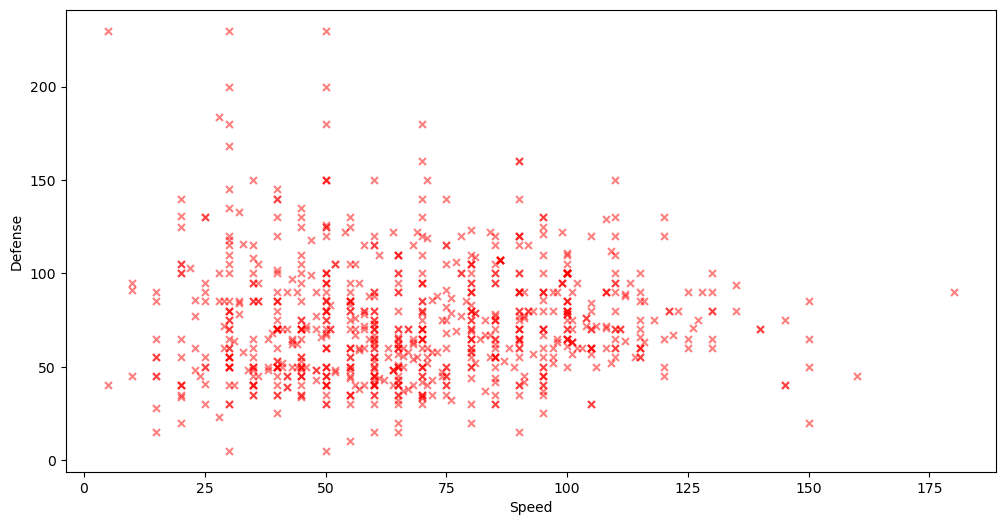

In [35]:
# Az előző ábra átalakítva
# figsize - az ábra mérete
# s - pontok mérete
# c - pontok színe
# marker - pontok alakja
# alpha - átlátszóság

plt.figure(figsize=(12,6))
plt.scatter(df['Speed'], df['Defense'], s=25, c='red', marker='x', alpha=0.5)
plt.xlabel("Speed")
plt.ylabel("Defense")
plt.show()

/tmp/ipykernel_5072/2964305350.py:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  stats_by_generation = df.groupby('Generation').mean()[['HP', 'Attack', 'Defense', 'Speed']]


<Axes: xlabel='Generation'>

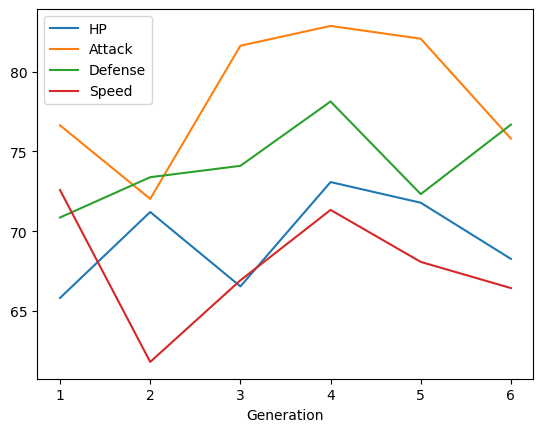

In [36]:
# Attribútumok generációnként

stats_by_generation = df.groupby('Generation').mean()[['HP', 'Attack', 'Defense', 'Speed']]
stats_by_generation.plot.line()

/tmp/ipykernel_5072/760500396.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  stats_by_gen_leg = df.groupby(by=['Generation', 'Legendary']).mean()[['HP', 'Attack']]


<Axes: xlabel='Generation,Legendary'>

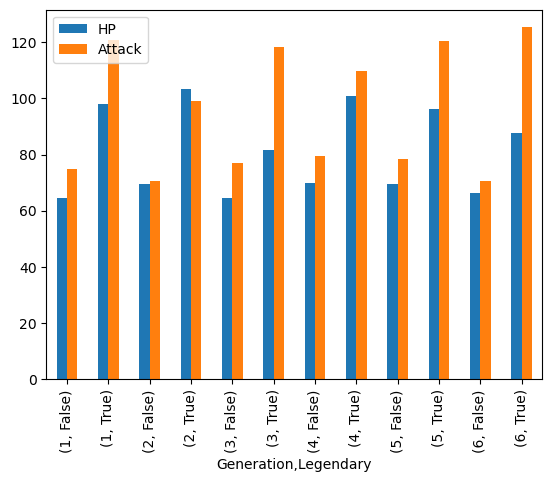

In [37]:
stats_by_gen_leg = df.groupby(by=['Generation', 'Legendary']).mean()[['HP', 'Attack']]
stats_by_gen_leg.plot.bar()

<Axes: xlabel='Generation,Legendary'>

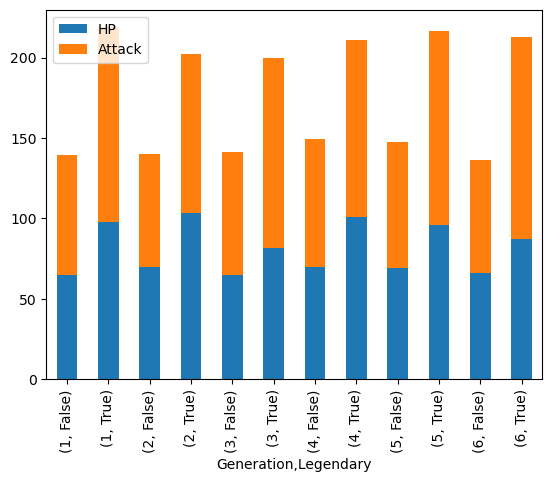

In [38]:
stats_by_gen_leg.plot.bar(stacked=True)

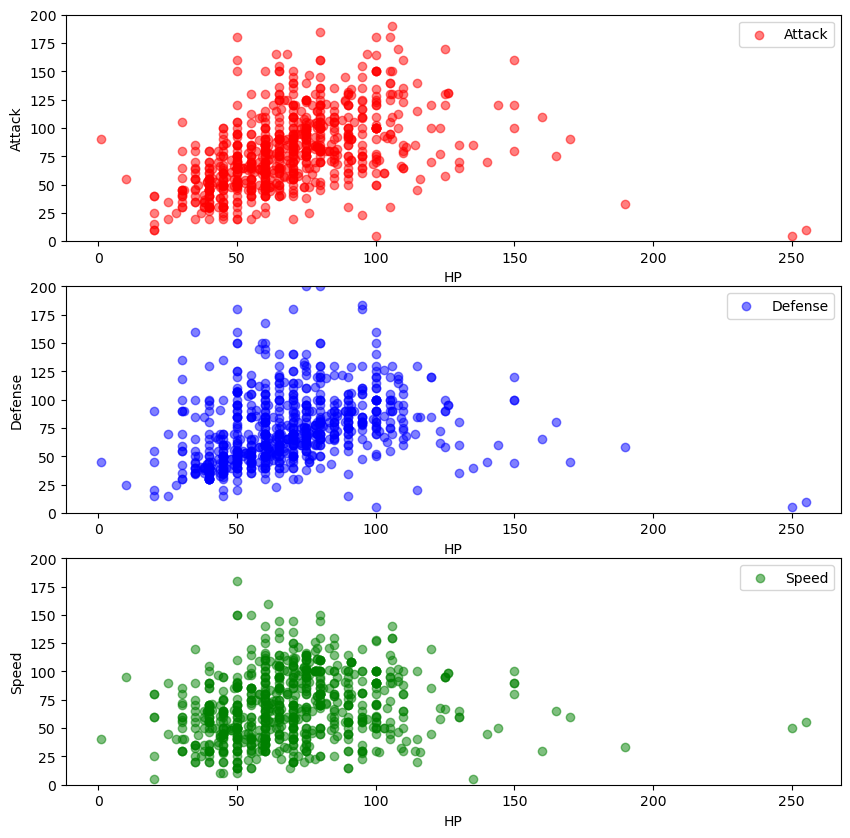

In [39]:
sel = df[['HP','Attack','Defense', 'Speed']]
clist = [x for x in sel.columns if x!='HP']
colors = ['red', 'blue', 'green']
fig, ax = plt.subplots(len(clist), 1, figsize=(10,10))
for i in range(len(clist)):
    cn = clist[i]
    ax[i].scatter(sel['HP'],sel[cn], alpha=0.5, label=cn, c=colors[i])
    ax[i].set_xlabel('HP')
    ax[i].set_ylabel(cn)
    ax[i].set_ylim(0,200)
    ax[i].legend()
plt.show()

/tmp/ipykernel_5072/3271596251.py:11: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  type_group = df.groupby(by='Type 1').mean()[['Attack']]


<Axes: xlabel='Type 1'>

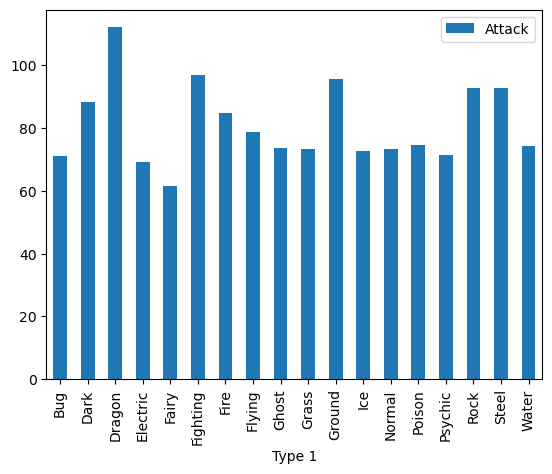

In [40]:
# Plot cheat sheet

# https://www.kaggle.com/code/themlphdstudent/cheatsheet-matplotlib-charts/notebook

# Plotolás feladatok

# 1. feladat
# Add meg, hogy milyen típusú pokémonok rendelkeznek átlagosan a legnagyobb támadó értékkel
# Ábrázolt az eredményt barchart segítségével

type_group = df.groupby(by='Type 1').mean()[['Attack']]
type_group.plot.bar()

<Axes: xlabel='Generation'>

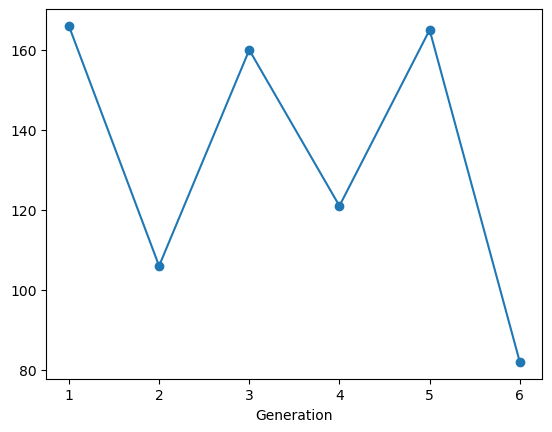

In [41]:
# 2. feladat
# Add meg, hogy az egyes generációkhoz hány pokémon tartozik.
# Jelenítsd meg az eredményt tetszőleges típusú ábrával.

generation_group = df.groupby(by='Generation').size()
generation_group.plot.line(marker='o')